Quelques conseils:
- pour exécutez une cellule, cliquez sur le bouton *Exécuter* ci-dessus ou tapez **Shift+Enter**
- si l'exécution d'une cellule prend trop de temps, sélectionner dans le menu ci-dessus *Noyau/Interrompre*
- en cas de très gros plantage *Noyau/Redémarrer*
- **sauvegardez régulièrement vos réponses** en cliquant sur l'icone disquette ci-dessus à gauche, ou *Fichier/Créer une nouvelle sauvegarde*

Pour répondre aux questions, remplacer les lignes  
```python 
#LA REPONSE ICI
raise NotImplementedError()
``` 
par vos réponses, et remplissez les champs ci-dessous:

In [1]:
NOM = "Martinez"
PRENOM = "Maud"
GROUPE = "1"
DATE = "11/10/2019"

---

# TD 3: Fonctions à 2 variables; représentation graphique; calcul matriciel

## Exercice 1 : tracés de fonctions

Tracer les fonctions mathématiques suivantes à l'aide des méthodes `ìmshow` et `plot_surface`. On cherchera à bien nommer les axes, et à rajouter une barre de couleur latéral.

$$ f(x,y) = \sin{\sqrt{x^2+y^2}} $$
pour $x\in [-5,5]$ et $ y\in [-5,5]$, puis $x\in [-50,50]$ et $ y\in [-50,50]$. A quoi vous fait penser cette fonction et quelle est la meilleure représentation graphique ?

In [2]:
#permet d'afficher les graphiques dans le notebook
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
from matplotlib import pyplot as plt
from  mpl_toolkits.mplot3d  import  Axes3D

def fonc (x, y) :
    return np.sin((x**2 + y**2)**0.5)
    

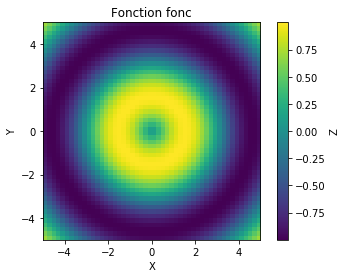

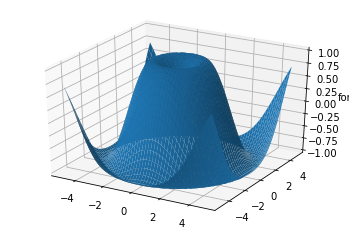

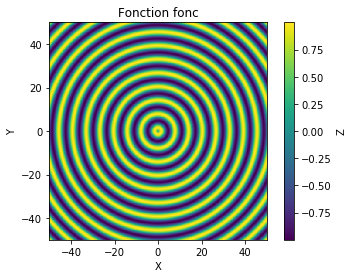

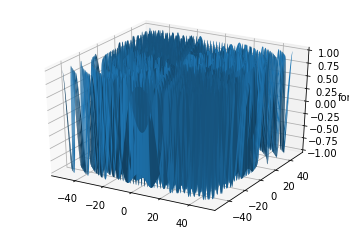

In [4]:
for n in (5,50):

#Données
    X= np.linspace(-n,n,n*10)
    Y= np.linspace(-n,n,n*10)
    XX,YY = np.meshgrid(X,Y)
    Z = fonc(XX,YY)

#Tracé du graphique avec imshow

    fig1= plt.figure()
    im = plt.imshow(Z, origin = 'lower', extent = [-n,n,-n,n])
    plt.title('Fonction fonc')
    plt.xlabel('X')
    plt.ylabel('Y')
    c=fig1.colorbar(im)
    c.set_label('Z')
    plt.show()

#Tracé du graphique avec plot_surface

    fig2= plt.figure()
    ax = fig2.gca(projection ='3d')
    surf = ax.plot_surface(XX,YY,Z)

    ax.set_zlim(-1.01,1.01)

    ax.set_zlabel('fonc')

    plt.show()    

$$ f(x,y) = x^2 - y^2 \text{ pour } x\in [-1,1] \text{ et } y\in [-1,1]$$
Qu'est-ce qui est remarquable sur cette fonction ?

In [5]:
def fonc_rem (x,y):
    return x**2-y**2

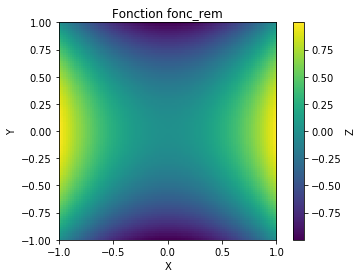

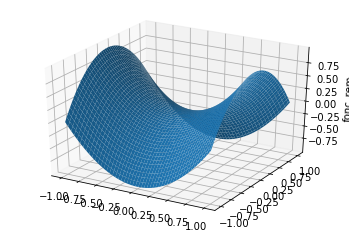

In [6]:
n=1
#Données
X= np.linspace(-n,n,100)
Y= np.linspace(-n,n,100)
XX,YY = np.meshgrid(X,Y)
Z = fonc_rem(XX,YY)
#Tracé du graphique avec imshow

fig1= plt.figure()
im = plt.imshow(Z, origin = 'lower', extent = [-n,n,-n,n])
plt.title('Fonction fonc_rem')
plt.xlabel('X')
plt.ylabel('Y')
c=fig1.colorbar(im)
c.set_label('Z')
plt.show()

#Tracé du graphique avec plot_surface

fig2= plt.figure()
ax = fig2.gca(projection ='3d')
surf = ax.plot_surface(XX,YY,Z)

#ax.set_zlim(-1.01,1.01)

ax.set_zlabel('fonc_rem')

plt.show() 

## Exercice 2 : Analyse d'une fonction 2D

Mathématiquement, la dérivée d'une fonction $f(x,y)$ soit par rapport à la variable $x$, soit par rapport à la variable $y$, est définie par ses dérivées partielles:

$$ \frac{\partial f}{\partial x}(x,y) = \lim\limits_{\epsilon \rightarrow 0} \frac{f(x+\epsilon,y)-f(x,y)}{\epsilon} $$

$$ \frac{\partial f}{\partial y}(x,y) = \lim\limits_{\epsilon \rightarrow 0} \frac{f(x,y+\epsilon)-f(x,y)}{\epsilon} $$

Le gradient d'une fonction est le vecteur des dérivées partielles :

$$\vec{\text{grad}}\ f(x,y) = \vec{\nabla} f(x,y)  = \left(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right)$$

Numériquement, comme la fonction est discrétisée en $\left\lbrace x_i\right\rbrace$ points, on peut essayer d'approcher cette définition du mieux possible en calculant le taux d'accroissement de la fonction entre deux points les plus proches possibles:

$$\frac{\partial f}{\partial x}(x_i,y_j) = \frac{f(x_{i+1},y_j)-f(x_i,y_j)}{x_{i+1}-x_{i}} $$
$$\frac{\partial f}{\partial y}(x_i,y_j) = \frac{f(x_i,y_{j+1})-f(x_i,y_j)}{y_{j+1}-y_{j}} $$

- Ecrire une fonction `gradient(f,x,y)` qui calcule les dérivées partielles d'une fonction `f` à deux variables. Les entrées `x` et `y` sont des tableaux 1D, et la sortie un vecteur contenant les dérivées partielles selon $x$ et $y$. On pourra consulter la documentation de la méthode `gradient` de `numpy` :
https://docs.scipy.org/doc/numpy/reference/generated/numpy.gradient.html
en faisant attention à la normalisation de la dérivée.

In [7]:
def gradient(f, x, y) :
    Nx = len(x)
    Ny = len(y)
   
    dFx = np.zeros((Nx,Ny))
    for j in range(Ny-1):
        for i in range(Nx-1) : 
            dFx[i][j] = ( f( x[i+1], y[j]) - f(x[i],y[j]) ) / (x[i+1] - x[i])
            
    dFy = np.zeros((Ny,Nx))
    for i in range(Nx-1):
        for j in range(Ny-1) : 
            dFy[i][j] = ( f( x[i], y[j+1]) - f(x[i],y[j]) ) / (y[j+1] - y[j])
    
    
    return np.array([dFx[:-1][:-1] ,dFy[:-1][:-1]])
        

- Tester cette fonction sur $f(x,y)=x^2-y^2$ pour $x\in [-1,1] \text{ et } y\in [-1,1]$. Tracer le résultat. Est-ce que ça vous semble conforme à ce que donne un calcul à la main ?

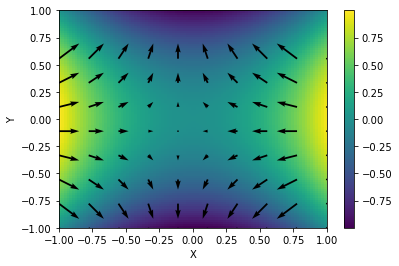

In [8]:
X1= np.linspace(-1,1,100)
Y1= np.linspace(-1,1,100)

X= np.linspace(-1,1,10)
Y= np.linspace(-1,1,10)
XX1,YY1 = np.meshgrid(X1,Y1)
XX,YY = np.meshgrid(X,Y)

dF = gradient(fonc_rem, X, Y)
dFx = dF[0]
dFy = dF[1]

#Tracé du graphique avec imshow

fig= plt.figure()
im = plt.pcolor(XX1,YY1,fonc_rem(XX1,YY1))
plt.quiver(XX[:-1][:-1],YY[:-1][:-1],dFy,dFx)
plt.xlabel('X')
plt.ylabel('Y')
c=fig.colorbar(im)
plt.show()

 - Existe-il un point où les dérivées partielles s'annulent toutes les deux ? Pour cela on pourra tracer la norme du gradient de $f$, puis à l'aide de la méthode `np.where` rechercher les points (x,y) tels que la norme du gradient est inférieur à un seuil proche de zéro.

In [9]:
N = (dFx**2+dFy**2)**0.5

ind = np.where(N< 0.00001)
print(ind)

(array([0, 1, 2, 3, 4, 4, 5, 6, 7]), array([9, 9, 9, 9, 4, 9, 9, 9, 9]))


- On cherche maintenant à calculer le Hessien de la fonction $f$, définie par:
$$\displaystyle{\nabla^2\ f(x,y) = \begin{pmatrix}
\frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial x\partial y} \\
\frac{\partial^2 f}{\partial y \partial x} & \frac{\partial^2 f}{\partial y^2} \\
\end{pmatrix}}$$

Créer une fonction `hessien(f,x,y)` qui a les mêmes entrées que la fonction `gradient` mais renvoie la matrice hessienne.

In [ ]:
def hessien(f,x,y):
    

- Comparer le résultat donné par la fonction `hessien` à un calcul à la main pour la fonction $f(x,y)$. Que constatez-vous ?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

- Le format du tableau en sortie de la fonction `hessien` n'est pas pratique à manipuler car c'est une matrice $2\times 2$ contenant des tableaux 1D (s'en convaincre avec la méthode `.shape`). Transposer le résultat pour avoir un tableau 2D de matrices $2\times 2$.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()


- La fonction $f(x,y)$ possède un point selle s'il existe un point $(x,y)$ pour lequel le gradient est nul et le hessien possède un déterminant négatif. Est-ce le cas ?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Exercice 3 : matrices en python

- Définissez les matrices
$$
A=\left[
\begin{array}{rr}
7&0\\
-1&5\\
-1&2
\end{array}
\right],\ \ \ 
B=\left[
\begin{array}{rr}
1&4\\
-4&0
\end{array}
\right],\ \ \
C=\left[
\begin{array}{r}
7\\
-3
\end{array}
\right],\ \ \
D=\left[
\begin{array}{rr}
8&2\\
\end{array}
\right].
$$ 

Calculez avec Python les produits $AB,\ CA,\ CD,\ DC,\ DBC,\ A^TA$ et $AA^T.$ Essayez de comprendre les éventuels messages d'erreur.

In [12]:
A=np.array([[7,0],[-1,5], [-1,2]])
B= np.array([[1,4],[-4,0]])
C=np.array([[7],[-3]])
D=np.array([8,2])

In [22]:
AB= np.dot(A,B)
DC=np.dot(D,C)
DBC=np.dot(np.dot(D,B),C)
AtA=np.dot(np.transpose(A),A)
AAt=np.dot(A,np.transpose(A))
print(AAt)

[[49 -7 -7]
 [-7 26 11]
 [-7 11  5]]



- Que font les commandes (on aura préalablement importé `numpy` sous le nom `np`):
$$
{\tt np.ones}((3,1)),\ \ \ {\tt np.ones}((1,3)),\ \ \ {\tt np.ones}(3),\ \ \ {\tt np.eye}(3),\ \ \ {\tt np.eye}(3,2) ?
$$

In [28]:
np.ones((3,1))
np.ones((1,3))
np.ones(3)
np.eye(3)
np.eye(3,2)

array([[1., 0.],
       [0., 1.],
       [0., 0.]])

- Définir de la façon la plus simple possible les vecteurs
\begin{align*}
&v1=(1,2,3,4,\dots,15,16)\\
&v2=(28,26,24,22,20,18,16,14,12)\\
&v3=(1,2,4,8,16,\dots,128,256)
\end{align*}
et la matrice
$$
A=\left[
\begin{array}{rrrrr}
1&2&4&\dots&2^8\\
1&3&9&\dots&3^8\\
1&5&25&\dots&5^8
\end{array}
\right]
$$

In [37]:
v1=np.arange(1,17)
v2=np.arange(28,11,-2)
v3=np.array([2**n for n in range(0,9)])
A=np.array([[2**n for n in range(0,9)],[3**n for n in range(0,9)],[5**n for n in range(0,9)]])
print(A)

[[     1      2      4      8     16     32     64    128    256]
 [     1      3      9     27     81    243    729   2187   6561]
 [     1      5     25    125    625   3125  15625  78125 390625]]


- Ecrire un code qui crée une matrice aléatoire de taille $5 \times 5$ et la normalise telle que la somme des valeurs absolues de ces éléments est égale à 1.

- Appliquer la fonction `numpy.linalg.eig` à la matrice
$$
\begin{pmatrix}
   1 & 1 \\
   0 & 1 
\end{pmatrix}
$$
et commenter.

In [39]:
M=np.array([[1,1],[0,1]])
print(np.linalg.eig(M))

(array([1., 1.]), array([[ 1.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  2.22044605e-16]]))


- Ecrire une fonction `transpose(A)` qui renvoie la transposée d’une matrice $A$
(pas forcément carrée) sans utiliser `numpy.transpose(A)`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Exercice 4 : matrice de Vandermonde

La matrice de Vandermonde est une matrice avec une progression géométrique dans chaque ligne. est une matrice carrée de taille $n\times n$ de la forme suivante:
$$ V={\begin{pmatrix}1&\alpha _{1}&{\alpha _{1}}^{2}&\dots &{\alpha _{1}}^{{n-1}}\\1&\alpha _{2}&{\alpha _{2}}^{2}&\dots &{\alpha _{2}}^{{n-1}}\\1&\alpha _{3}&{\alpha _{3}}^{2}&\dots &{\alpha _{3}}^{{n-1}}\\\vdots &\vdots &\vdots &&\vdots \\1&\alpha _{m}&{\alpha _{m}}^{2}&\dots &{\alpha _{m}}^{{n-1}}\\\end{pmatrix}} $$
Dans la suite on s'intéressse uniquement aux matrices de Vandermonde carrées ($m=n$)

- Créer une matrice de Vandermonde de taille $N=8$ en prenant $\alpha_i=i$.

In [44]:
Vander=np.ones((8,8))
for i in range(1,9):
    for n in range(0,8):
        Vander[i-1][n]=i**n

- Calculer son déterminant avec `numpy`. Vérifier que celui-ci est nul si deux $\alpha_i$ sont égaux.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

- Un calcul classique d'algèbre en licence consiste à prouver que le déterminant d'une matrice de Vandermonde a pour formule analytique:
$$   \det(V)=\prod _{{1\leq i<j\leq n}}(\alpha _{j}-\alpha _{i}) $$
Créer une fonction qui `determinant_analtyique(V)` qui calcule le déterminant d'une matrice de Vandermonde `V` par la formule analytique.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

- Comparer le résultat obtenu par cette formule et celui fourni par `numpy` pour des tailles de matrice `N` allant de 2 à 20. On présentera la différence relative sous forme de graphique.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

- Pour `N=15` comparer le temps d'exécution des deux formules à l'aide du module `time`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

- La morale de cet exercice est qu'il est quasiment toujours préférable de coder la réponse analytique d'un problème complexe (en terme de précision du résultat, de rapidité, voir de mémoire) que d'utiliser des fonctions génériques à l'aveugle.